1. FEATURES EXTRACTION USING **AUTO_ENCODER**
2. DIMENSION REDUCTION BY **TSNE**                   
3. CALCULATE **FID**(**F**rechet **I**nception **D**istance) FOR RANDOMALLY VECTORS OF INDEXES 
4. SELECT THE INDEXES THAT RECEIVED THE LOWEST FID 




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
 
import torchvision.transforms as transforms
from torchvision.utils import make_grid
 
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
 
import torch.nn as nn
import torch.nn.functional as F
import torch
 
import os
import glob
 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
from tensorflow import keras,summary
#from keras.applications.vgg16 import VGG16
from sklearn.manifold import TSNE
from keras import models, layers
from sklearn.cluster import KMeans
import collections

import sys
sys.path.insert(0, "sample_data")
#from Functions import Load_images 
import Functions

LOAD MONET IMAGES

In [3]:
images = Functions.Load_images()

100%|██████████| 300/300 [00:00<00:00, 448.68it/s]


In [4]:
images = images/255
print(images[0][0][0][0])

0.6980392156862745


FEATURES EXTRACTION USING AUTO_ENCODER

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

import keras
from keras import models, layers

In [7]:
#Featers Extraction by AutoEncoder
input_img = keras.Input(shape=(256, 256, 3))

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0     

In [23]:
input_img = keras.Input(shape=(256, 256, 3))

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
#x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
#x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(encoded)
#x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
#x = layers.UpSampling2D((2, 2))(x)
#x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
#x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
#x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

autoencoder.summary()



Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 128)       0   

In [26]:

autoencoder.fit(images, images,
                epochs=30,
                batch_size=1,
                shuffle=True)

Epoch 1/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0061 - accuracy: 0.6756
Epoch 2/30
300/300 [==============================] - 5s 15ms/step - loss: 0.0050 - accuracy: 0.6959
Epoch 3/30
300/300 [==============================] - 5s 15ms/step - loss: 0.0058 - accuracy: 0.6833
Epoch 4/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0052 - accuracy: 0.6762
Epoch 5/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0055 - accuracy: 0.6744
Epoch 6/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0046 - accuracy: 0.6958
Epoch 7/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0048 - accuracy: 0.6892
Epoch 8/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0049 - accuracy: 0.6830
Epoch 9/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0047 - accuracy: 0.6993
Epoch 10/30
300/300 [==============================] - 5s 16ms/step - loss: 0.0053 - accura

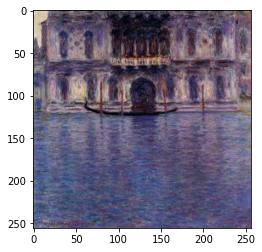

In [27]:

plt.imshow(images[1])

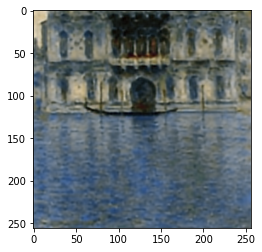

In [30]:
plt.imshow(autoencoder.predict(images[1].reshape(1, 256, 256, 3))[0])

In [31]:
encoder = keras.Model(input_img, encoded)

encoded_imgs = encoder.predict(images[0:300].reshape(300, 256, 256, 3))
encoded_imgs.shape

(300, 64, 64, 128)

DIMENSION REDUCTION BY TSNE

In [32]:
tsneAllImages = TSNE(n_components=700,method='exact').fit_transform( encoded_imgs.reshape(300,-1))
print(tsneAllImages.shape)

(300, 700)


* CALCULATE **FID** (Frechet Inception Distance) FOR RANDOMALLY VECTORS OF INDEXES 
* SELECT THE INDEXES THAT RECEIVED THE LOWEST FID 

In [36]:
min_fid,indexes_with_min_fid= Functions.Find_indexes_whith_min_Fid_from_random_vectors(tsneAllImages,100)

FID (temp min): 187.362
0
[252   8 173  46 267 191   4 204  63 239  34  55 118 244 214 111  72  35
  67 169  50 173 271  64  74 112 270 283  19 108]
FID (temp min): 185.438
26
[273 103  46  94  20 184 275  74 205  63 117  99 266  39  36  72 252  91
 128 231 216 264 136 207 238 229 189 144 123  72]
FID (temp min): 182.008
40
[101 147 123 152 124  79 142  82 143  82 119  71  90 255 228  71  89   6
 180 253 286 293 106 112  91  65 110 238 159 290]
FID (temp min): 181.248
49
[249 243   2 266  51 284  74  87 210 231  43  66 143 182 226 184  13 167
 224  21 232  84 224 177 142 178 256 249  58 244]
MIN Final---FID : 181.248
The Selected Indexes Are: 
[249 243   2 266  51 284  74  87 210 231  43  66 143 182 226 184  13 167
 224  21 232  84 224 177 142 178 256 249  58 244]
